# **My Pornstar Graph**

In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import statistics

from count import give_top_n, give_nut_count_pornstar
from processing import read_pornstars, prepare_for_cpp, read_frequency_per_pornstar, read_frequency_per_pornstar_pair
from pornstar import capitalize_name

# **Chapter 1: reading CSV data**

In [2]:
files: pl.DataFrame = pl.read_csv("data/filesData.csv", infer_schema_length=15_000)
display(files.head(3))

shape: (3, 11)
┌─────────────────────────┬──────────┬───────────┬───────────┬───┬────────────┬──────────────────┬──────────┬──────────┐
│ filename                ┆ fileType ┆ nutted    ┆ sizeBytes ┆ … ┆ resolution ┆ creationDate     ┆ tagCount ┆ location │
│ ---                     ┆ ---      ┆ ---       ┆ ---       ┆   ┆ ---        ┆ ---              ┆ ---      ┆ ---      │
│ str                     ┆ str      ┆ str       ┆ i64       ┆   ┆ str        ┆ str              ┆ i64      ┆ str      │
╞═════════════════════════╪══════════╪═══════════╪═══════════╪═══╪════════════╪══════════════════╪══════════╪══════════╡
│ Sexy looking bride      ┆ Video    ┆ Nee       ┆ 191600555 ┆ … ┆ 582x388    ┆ 14-10-2023 03.06 ┆ 1        ┆ hdd      │
│ gangbanged by…          ┆          ┆           ┆           ┆   ┆            ┆ uur              ┆          ┆          │
│ (XW49) FACIAL ABUSE     ┆ Video    ┆ Misschien ┆ 415677891 ┆ … ┆ 1280x720   ┆ 30-11-2023 03.03 ┆ 2        ┆ hdd      │
│ Danica Dillo…           ┆          ┆           ┆           ┆   ┆            ┆ uur              ┆          ┆          │
│ SpankBang.com_s44ksmiwm ┆ Video    ┆ Nee       ┆ 253527172 ┆ … ┆ 648x480    ┆ 17-10-2023 17.56 ┆ 1        ┆ hdd      │
│ vj_480p (…              ┆          ┆           ┆           ┆   ┆            ┆ uur              ┆          ┆          │
└─────────────────────────┴──────────┴───────────┴───────────┴───┴────────────┴──────────────────┴──────────┴──────────┘

In dit segement wordt wat algemene informatie veschaft ten aanzien van de verslaving.

# **Chapter 2: Pornstars – Most Nutted**

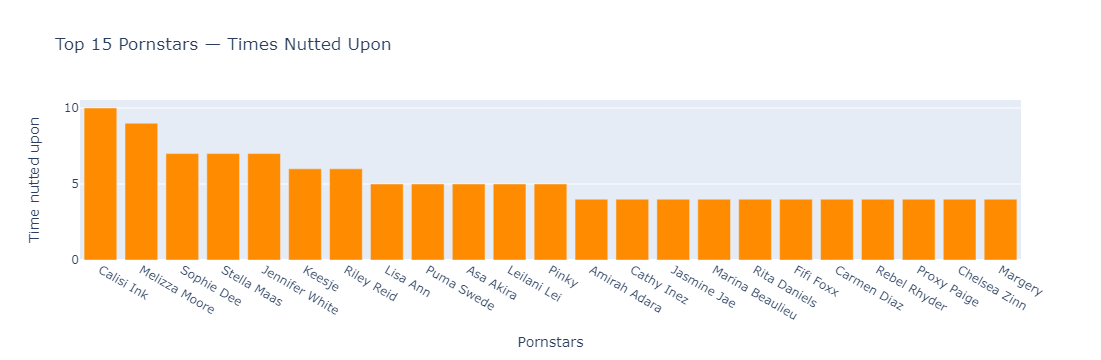

In [3]:
sterren: set[str] = read_pornstars()

frequency_nut_per_pornstar_sure: dict[str, int] = give_nut_count_pornstar(sterren, files["filename"], certain_nuts=True)

N: int = 15
pornstars_most_nutted: dict[str, int] = give_top_n(frequency_nut_per_pornstar_sure, n=N)

fig: go.Figure = go.Figure(data=go.Bar(x=list(pornstars_most_nutted.keys()), y=list(pornstars_most_nutted.values()), marker_color="darkorange"))
fig.update_layout(title=f"Top {N} Pornstars — Times Nutted Upon", xaxis_title="Pornstars", yaxis_title="Time nutted upon")
fig.show()

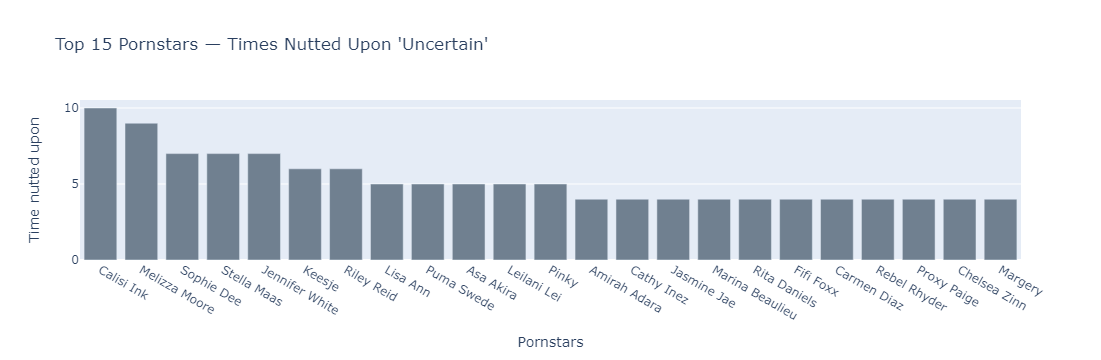

In [4]:
frequency_nut_per_pornstar_unsure: dict[str, int] = give_nut_count_pornstar(sterren, files["filename"], certain_nuts=False)

N: int = 15
pornstars_most_nutted_unsure: dict[str, int] = give_top_n(frequency_nut_per_pornstar_sure, n=N)

fig: go.Figure = go.Figure(data=go.Bar(x=list(pornstars_most_nutted_unsure.keys()), y=list(pornstars_most_nutted_unsure.values()), marker_color="slategrey"))
fig.update_layout(title=f"Top {N} Pornstars — Times Nutted Upon 'Uncertain'", xaxis_title="Pornstars", yaxis_title="Time nutted upon")
fig.show()

# **Chapter 3: Frequencies Pornstars**

In [5]:
prepare_for_cpp(files["filename"])

# **IF YOU WANT TO MAKE YOUR OWN PORNSTAR GRAPH, RUN THE C++ PROGRAMME NOW**

- add YOUR OWN file paths if needed
- `g++ frequency.cpp support.cpp data_processing.cpp main.cpp -O3 -o main -lwinmm`
- `./main`

... and restart your kernel.

In [6]:
frequencies_pornstars: dict[str, int] = read_frequency_per_pornstar()
frequencies_pornstars = {capitalize_name(pornstar): frequency for pornstar, frequency in frequencies_pornstars.items()}

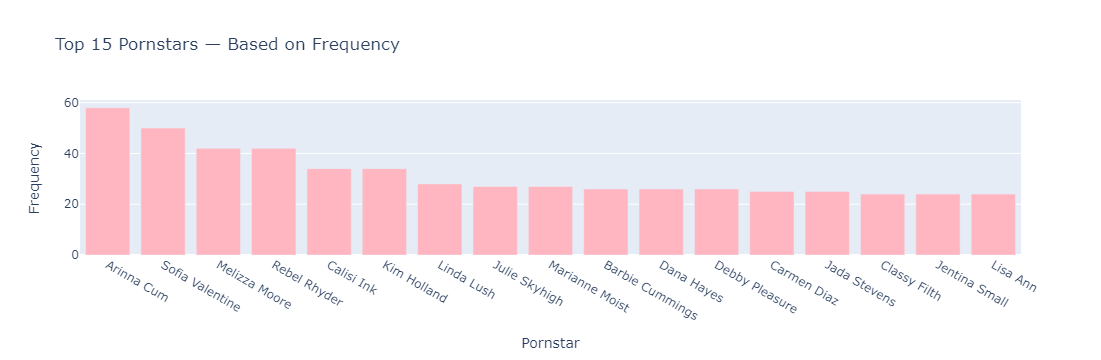

In [7]:
N: int = 15
top_n_pornstars: dict[str, int] = give_top_n(frequencies_pornstars, n=N)

fig: go.Figure = go.Figure(data=go.Bar(x=list(top_n_pornstars.keys()), y=list(top_n_pornstars.values()), marker_color="lightpink"))
fig.update_layout(
    title=f"Top {N} Pornstars — Based on Frequency",
    xaxis_title="Pornstar",
    yaxis_title="Frequency",
)
fig.show()

# **Chapter 4: The Pornstar Graph**

In [8]:
import networkx as nx
import random
from typing import Any

from graph import make_graph, add_edges, size_gigant_component_after_deletion_node, frequencies_degrees, amount_of_edges_needed_for_complete_graph
import color

In [9]:
frequency_per_pornstar_pair: dict[tuple[str, str], int] = read_frequency_per_pornstar_pair()
frequency_per_pornstar_pair = {
    (capitalize_name(pornstars[0]), capitalize_name(pornstars[1])):
    frequency for pornstars, frequency in frequency_per_pornstar_pair.items()
}

pormstars: set[str] = set(frequencies_pornstars.keys())  # alle sterren met een frequentie > 0
S: nx.Graph = make_graph(pormstars)
S: nx.Graph = add_edges(S, frequency_per_pornstar_pair)

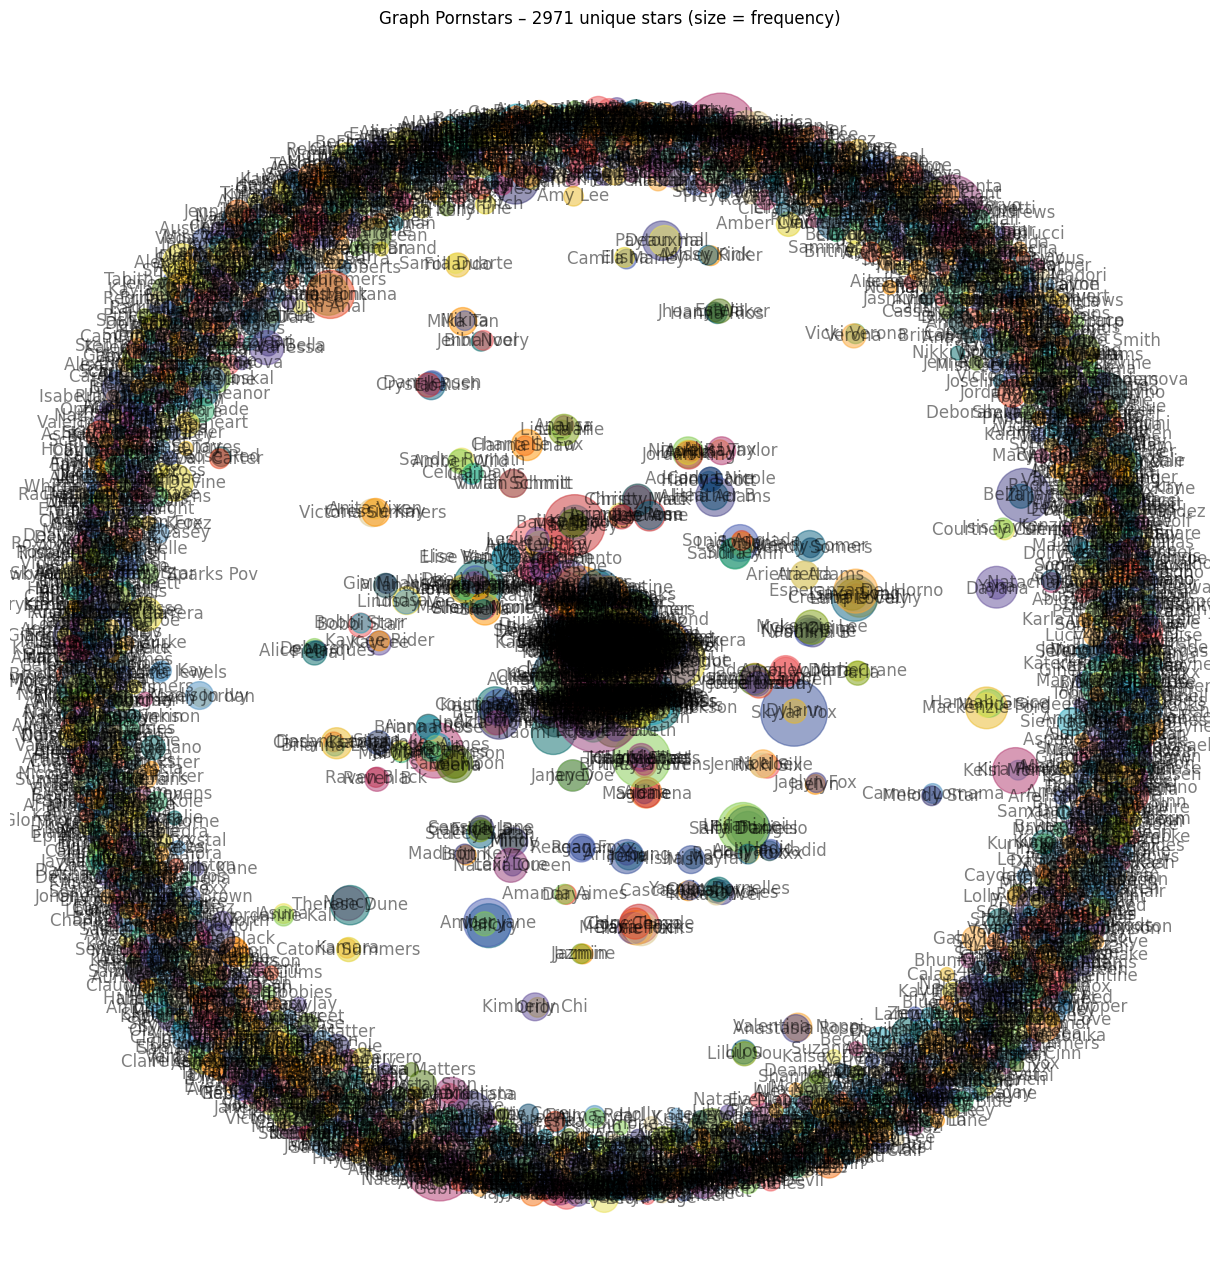

GRAPH INFORMATION:
----------------------------------------------------------
- amount of pornstars without a connection: 2278 (76.7%);
- clustering coefficient: 0.061;
- density: 0.0;
- minimum reach pornstar: 1;
- minimum reach pornstar: 355;
- average degree pornstar: 0.6;
- average reach pornstars pornstar: 44.5;
- amount of cliques: 34;
- amount of edges needed for complete graph: 4411032.


In [10]:
pornstar_sizes: list[int] = [frequencies_pornstars[pornstar] * 100 for pornstar in S]
pornstar_colours: list[str] = [random.choice(color.MY_COLOURS) for pornstar in S]

positions: dict[Any, Any] = nx.spring_layout(S, seed=42)

plt.figure(figsize=(12, 12))
nx.draw(S, with_labels=True, pos=positions, node_size=pornstar_sizes, node_color=pornstar_colours, alpha=0.5)
plt.title(f"Graph Pornstars – {len(S)} unique stars (size = frequency)\n")
plt.show()

reach_pornstars: dict[str, int] = {pornstar1: sum(1 for pornstar2 in S if nx.has_path(S, pornstar1, pornstar2)) for pornstar1 in S}

minimum_reach: int = min(reach_pornstars.values())
maximum_reach: int = max(reach_pornstars.values())
average_reach_pornstars: float = statistics.mean(reach_pornstars.values())

degrees_S: set[int] = [degree for pornstar, degree in S.degree()]
average_degree: float = round(statistics.mean(degrees_S), 1)

stars_without_connection: set[str] = {pornstar for pornstar in S if S.degree(pornstar) == 0}

print(f"GRAPH INFORMATION:\n{58 * '-'}")
print(f"- amount of pornstars without a connection: {len(stars_without_connection)} ({round((len(stars_without_connection) / len(S) * 100), 1)}%);")
print(f"- clustering coefficient: {round(nx.average_clustering(S), 3)};")
print(f"- density: {round(nx.density(S), 3)};")
print(f"- minimum reach pornstar: {minimum_reach};")
print(f"- minimum reach pornstar: {maximum_reach};")
print(f"- average degree pornstar: {average_degree};")
print(f"- average reach pornstars pornstar: {round(average_reach_pornstars, 1)};")
print(f"- amount of cliques: {len([(clique) for clique in nx.find_cliques(S) if len(clique) > 3])};")
print(f"- amount of edges needed for complete graph: {amount_of_edges_needed_for_complete_graph(S)}.")

In [11]:
frequencies_degrees_: dict[str, int] = frequencies_degrees(S)

dataframe_degrees: pd.DataFrame = pd.DataFrame(list(frequencies_degrees_.items()), columns=["Degrees", "Frequency"])
display(dataframe_degrees.T)

0    1    2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
Degrees       0    1    2  12   8   5   7   6   3   4  15  11  14  16  10   9   
Frequency  2278  323  154   4   9  33  11  26  71  37   2   5   3   1   7   3   

           16  17  
Degrees    17  13  
Frequency   1   3

## **4.1 Giant component**

In [12]:
connected_components: list[set[str]] = list(nx.connected_components(S))
giant_component: set[str] = max(connected_components, key=len)
size_giant_component: int = len(giant_component)

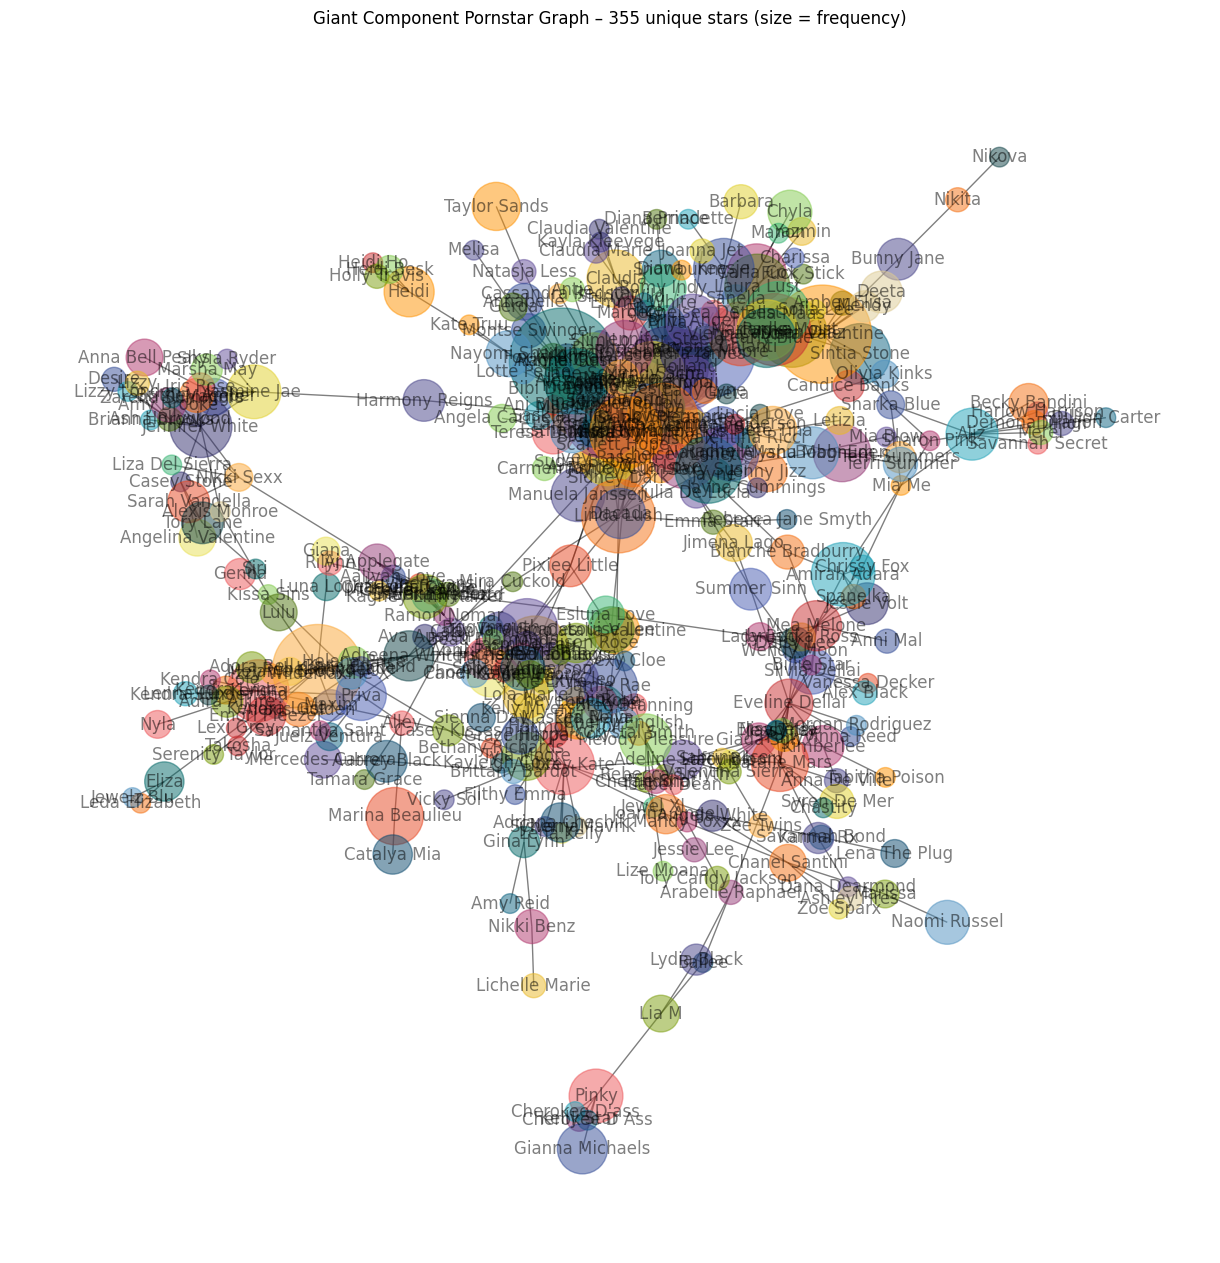

GRAPH INFORMATION:
----------------------------------------------------------
- amount of pornstars without a connection: 0 (0.0%);
- clustering coefficient: 0.336;
- density: 0.01;
- minimum reach pornstar: 355;
- minimum reach pornstar: 355;
- average degree pornstar: 3.5;
- average reach pornstars pornstar: 355;
- amount of cliques: 29;
- amount of edges needed for complete graph: 62205.


In [13]:
S_giant_component: nx.Graph = S.subgraph(giant_component)

pornstar_sizes: list[int] = [frequencies_pornstars[pornstar] * 100 for pornstar in S_giant_component]
pornstar_colours: list[str] = [random.choice(color.MY_COLOURS) for pornstar in S_giant_component]

positions: dict[Any, Any] = nx.spring_layout(S_giant_component, seed=42)

plt.figure(figsize=(12, 12))
nx.draw(S_giant_component, with_labels=True, pos=positions, node_size=pornstar_sizes, node_color=pornstar_colours, alpha=0.5)
plt.title(f"Giant Component Pornstar Graph – {len(S_giant_component)} unique stars (size = frequency)\n")
plt.show()

reach_pornstars: dict[str, int] = {pornstar1: sum(1 for pornstar2 in S_giant_component if nx.has_path(S_giant_component, pornstar1, pornstar2)) for pornstar1 in S_giant_component}

minimum_reach: int = min(reach_pornstars.values())
maximum_reach: int = max(reach_pornstars.values())
average_reach_pornstars: float = statistics.mean(reach_pornstars.values())

degrees_S: set[int] = [degree for pornstar, degree in S_giant_component.degree()]
average_degree: float = round(statistics.mean(degrees_S), 1)

stars_without_connection: set[str] = {pornstar for pornstar in S_giant_component if S_giant_component.degree(pornstar) == 0}

print(f"GRAPH INFORMATION:\n{58 * '-'}")
print(f"- amount of pornstars without a connection: {len(stars_without_connection)} ({round((len(stars_without_connection) / len(S_giant_component) * 100), 1)}%);")
print(f"- clustering coefficient: {round(nx.average_clustering(S_giant_component), 3)};")
print(f"- density: {round(nx.density(S_giant_component), 3)};")
print(f"- minimum reach pornstar: {minimum_reach};")
print(f"- minimum reach pornstar: {maximum_reach};")
print(f"- average degree pornstar: {average_degree};")
print(f"- average reach pornstars pornstar: {round(average_reach_pornstars, 1)};")
print(f"- amount of cliques: {len([(clique) for clique in nx.find_cliques(S_giant_component) if len(clique) > 3])};")
print(f"- amount of edges needed for complete graph: {amount_of_edges_needed_for_complete_graph(S_giant_component)}.")

## **4.2 Top Pornstars**

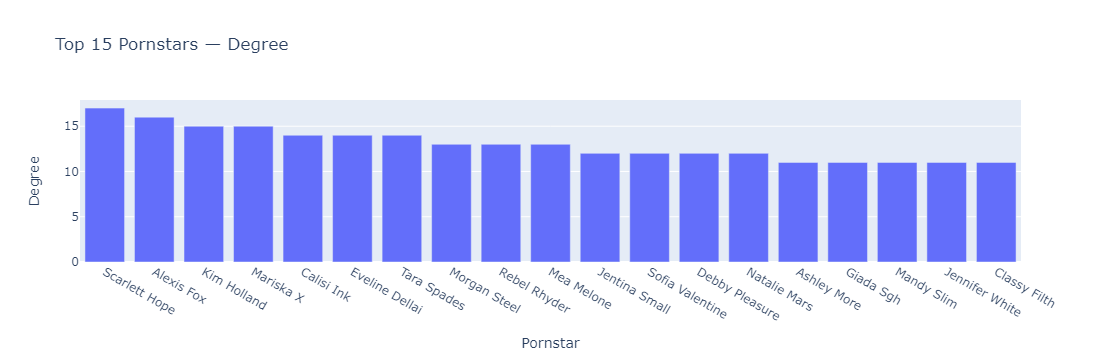

In [14]:
N: int = 15
pornstars_with_degrees: dict[str, int] = {pornstar: degree for pornstar, degree in S.degree()}
top_n_pornstars_hightest_degree: dict[str, int] = give_top_n(pornstars_with_degrees, n=N)

fig: go.Figure = go.Figure(data=go.Bar(x=list(top_n_pornstars_hightest_degree.keys()), y=list(top_n_pornstars_hightest_degree.values())))
fig.update_layout(title=f"Top {N} Pornstars — Degree", xaxis_title="Pornstar", yaxis_title="Degree")
fig.show()

## **4.3 Ego Graphs Top Pornstars**

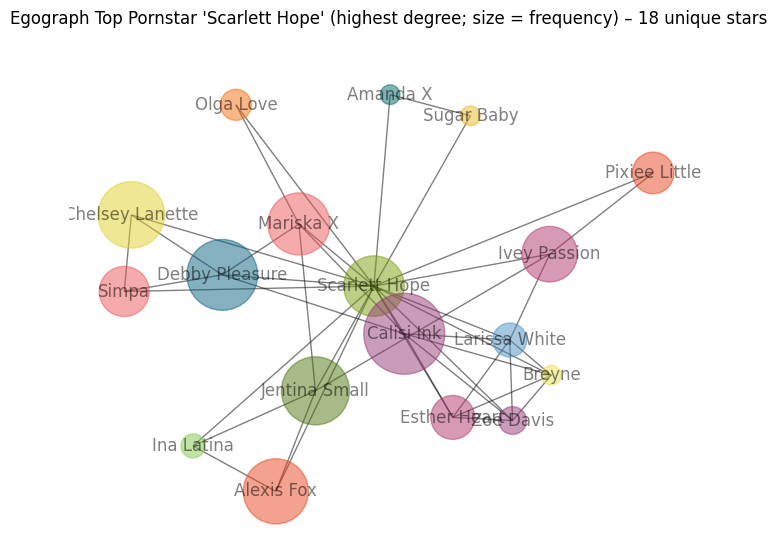

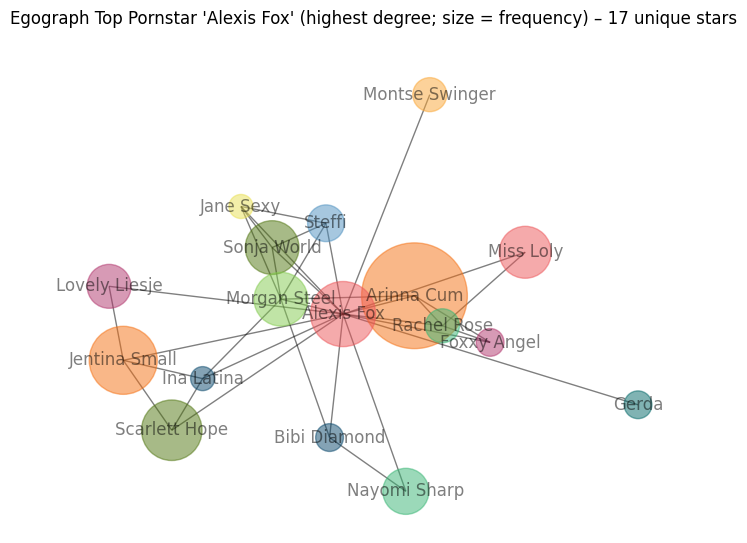

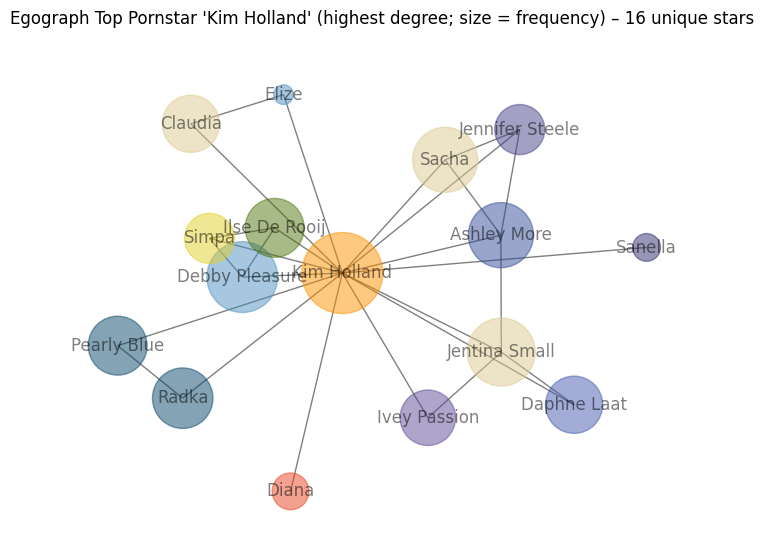

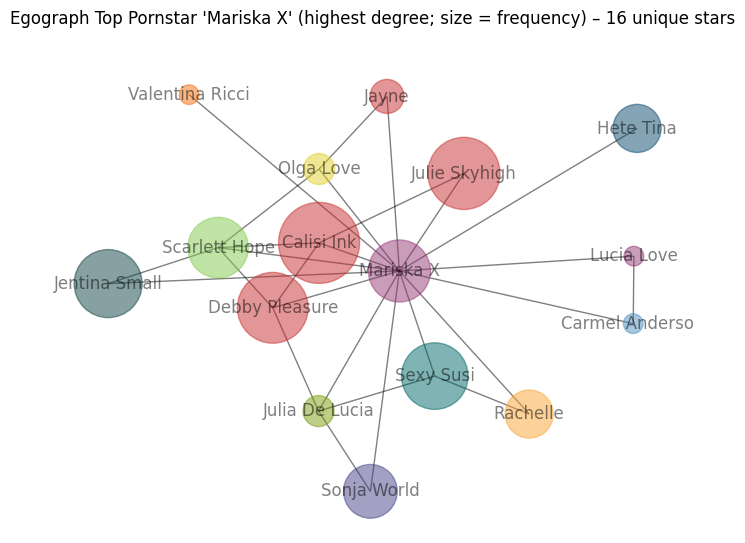

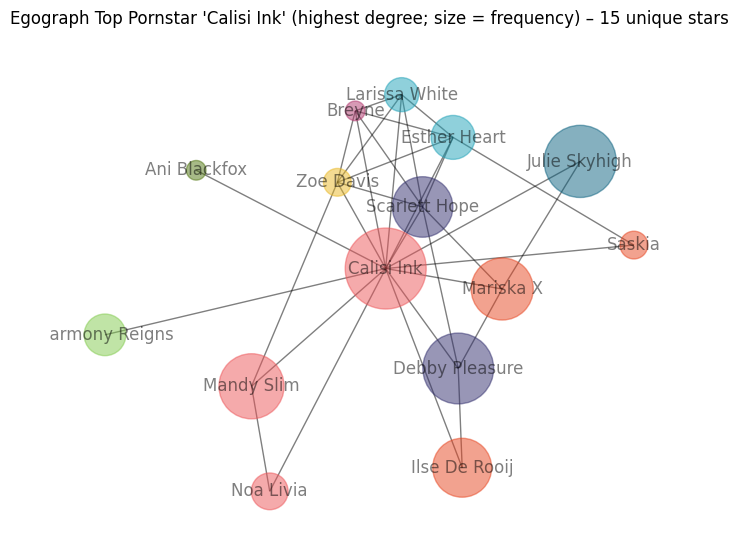

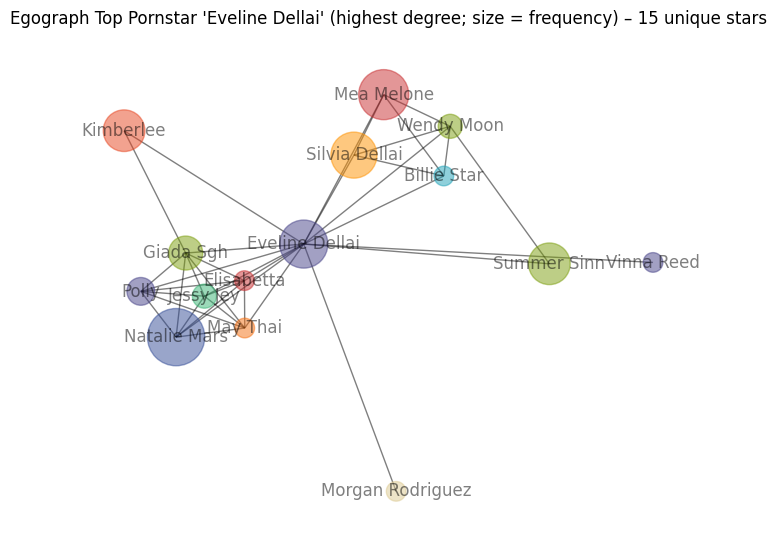

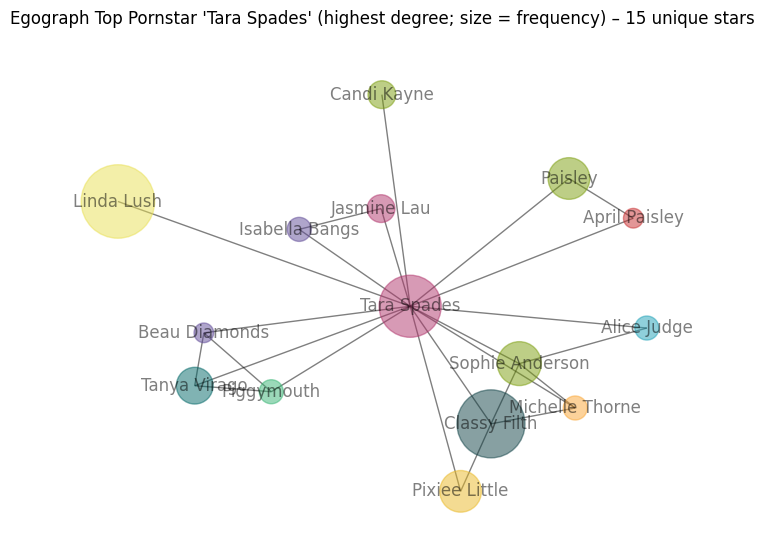

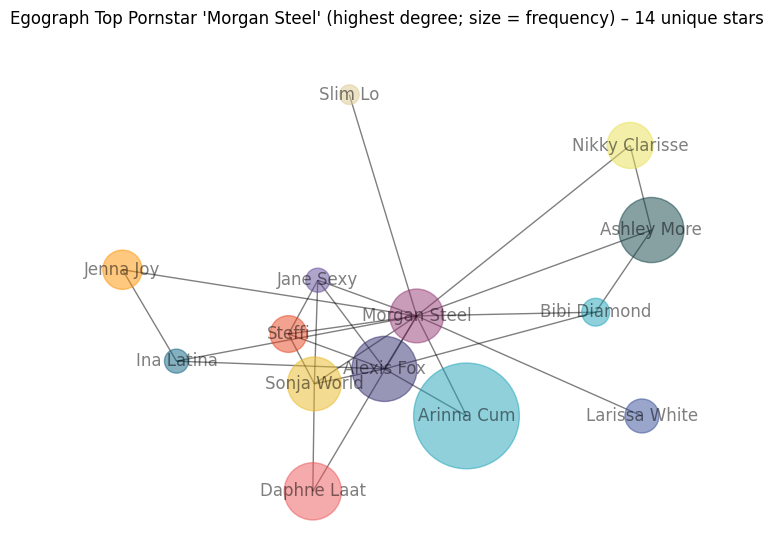

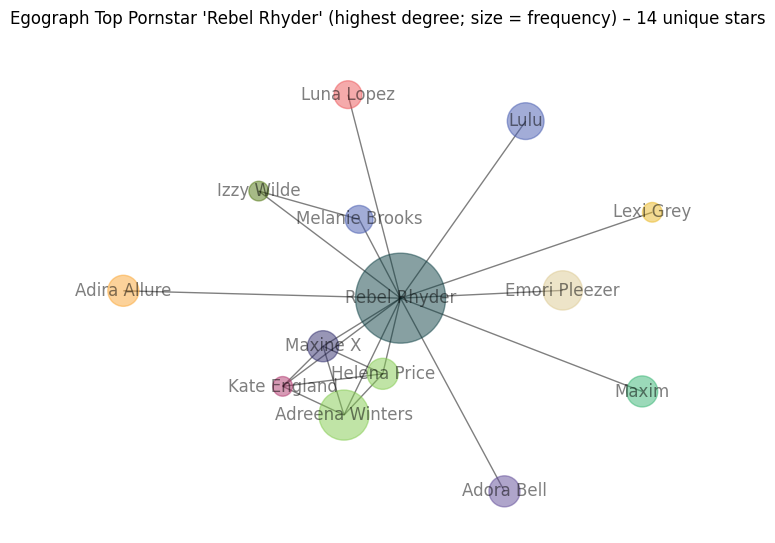

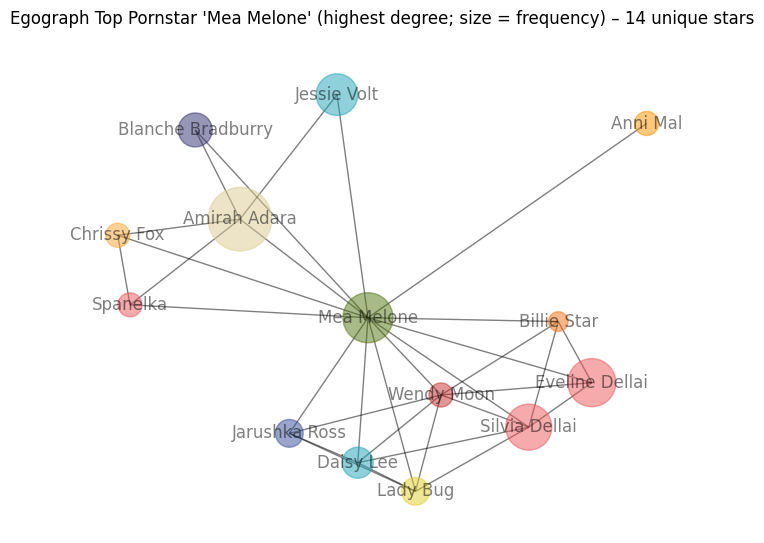

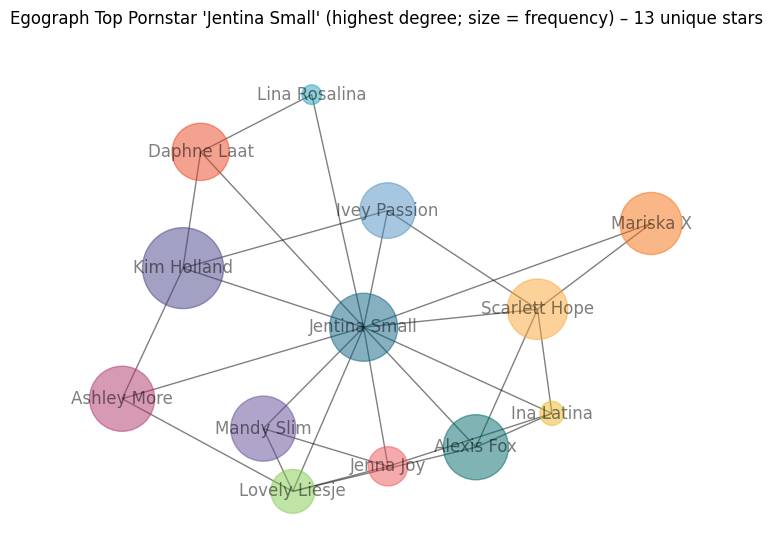

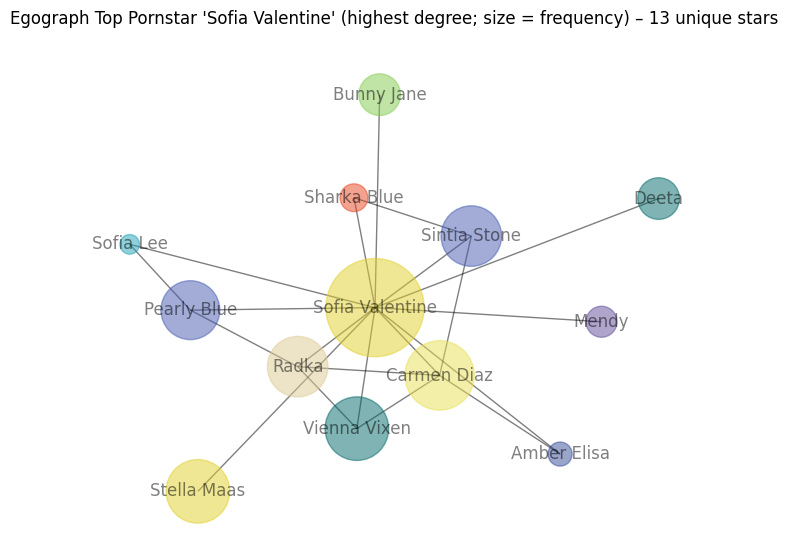

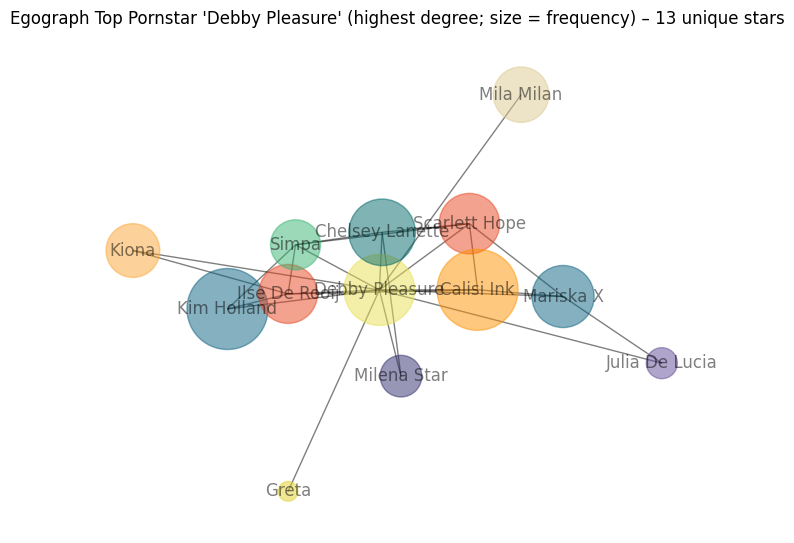

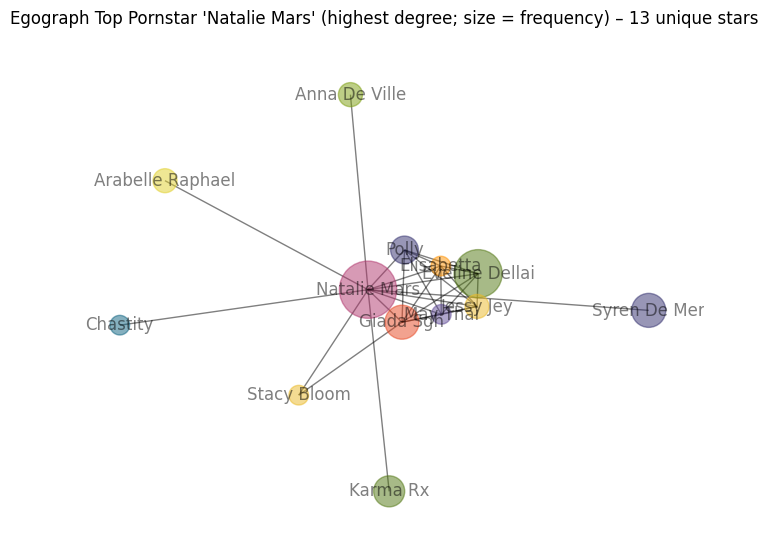

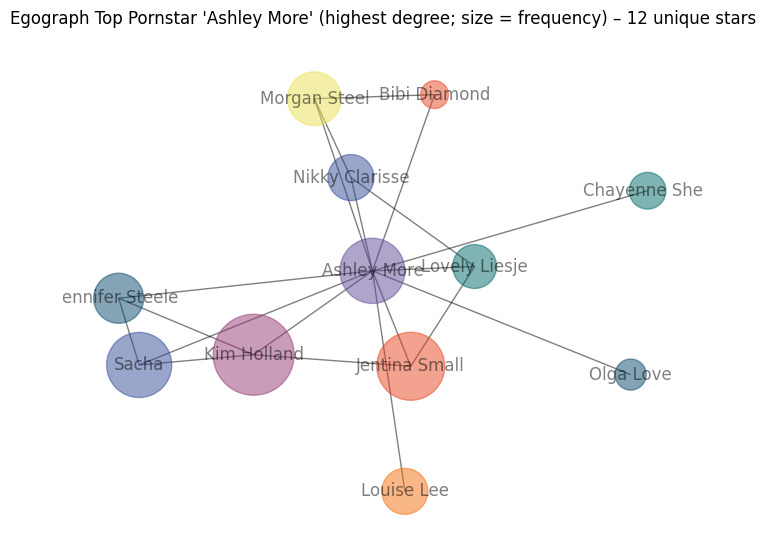

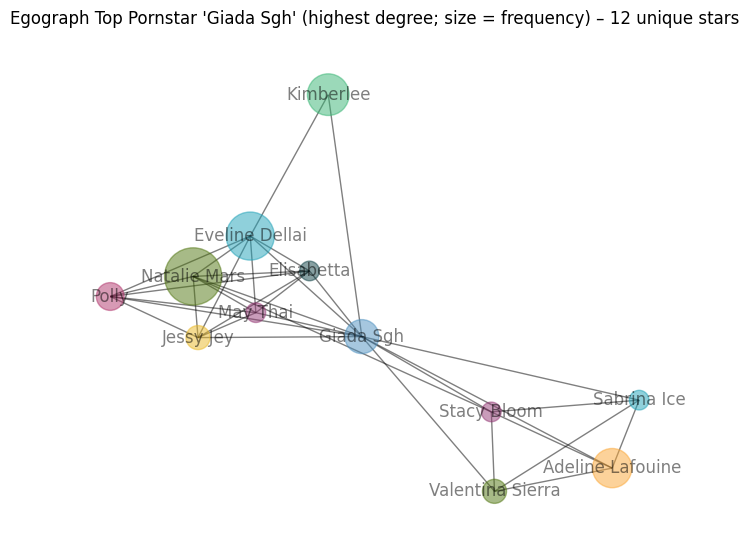

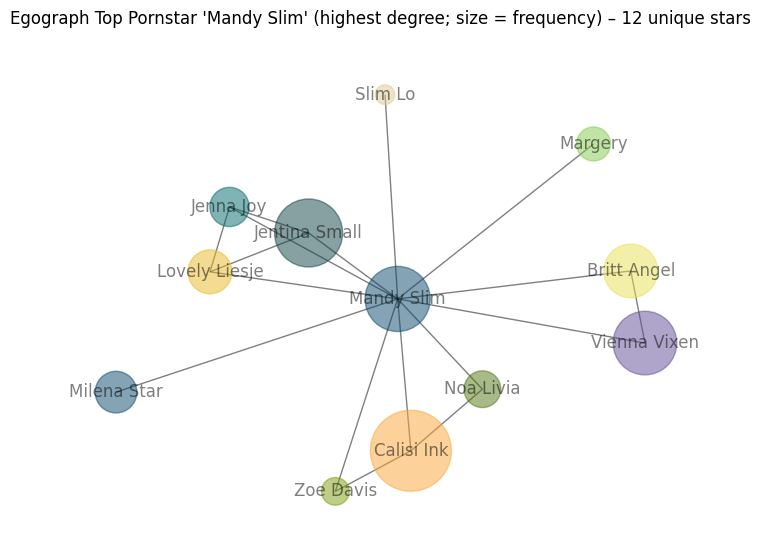

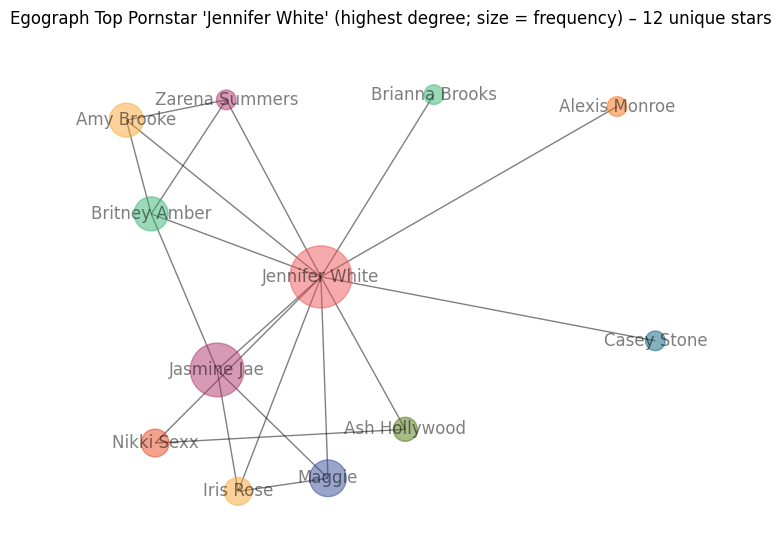

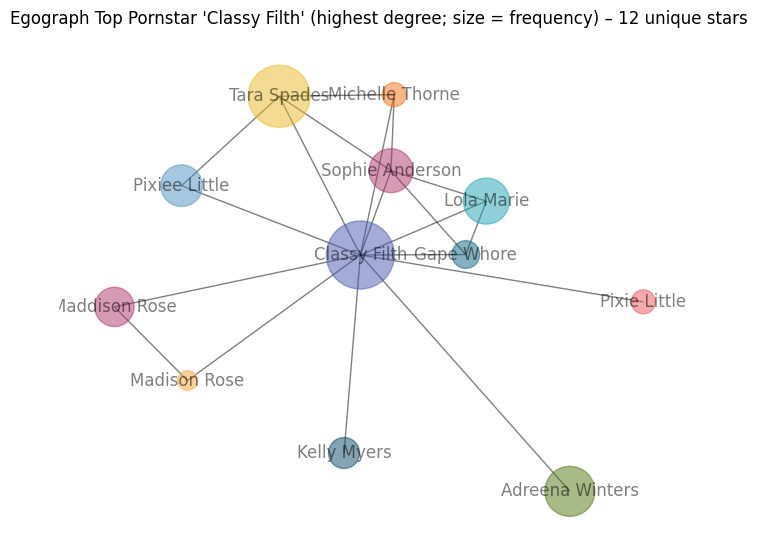

In [15]:
for top_pornstar in top_n_pornstars_hightest_degree.keys():
    subgraph_pornstar: nx.Graph = nx.ego_graph(S, top_pornstar)

    pornstar_sizes: list[int] = [frequencies_pornstars[pornstar] * 100 for pornstar in subgraph_pornstar]
    pornstar_colours: list[str] = [random.choice(color.MY_COLOURS) for pornstar in subgraph_pornstar]
    
    nx.draw(subgraph_pornstar, with_labels=True, node_size=pornstar_sizes, node_color=pornstar_colours, alpha=0.5)
    plt.title(f"Egograph Top Pornstar '{top_pornstar}' (highest degree; size = frequency) – {len(subgraph_pornstar)} unique stars\n")
    plt.show()

## **4.4 Big-Effect Pornstar**

In [16]:
pornstars_with_effect: dict[int, int] = {pornstar: size_gigant_component_after_deletion_node(S, pornstar) for pornstar in S}
biggest_effect_pornstar: int = min(pornstars_with_effect, key=pornstars_with_effect.get)

print(f"The biggest-effect pornstar is: '{biggest_effect_pornstar}'; her betweenneess centrality is: {round(nx.betweenness_centrality(S)[biggest_effect_pornstar], 3)}.")

The biggest-effect pornstar is: 'Eveline Dellai'; her betweenneess centrality is: 0.002.


## **4.5 Top Pornstar Duo's**

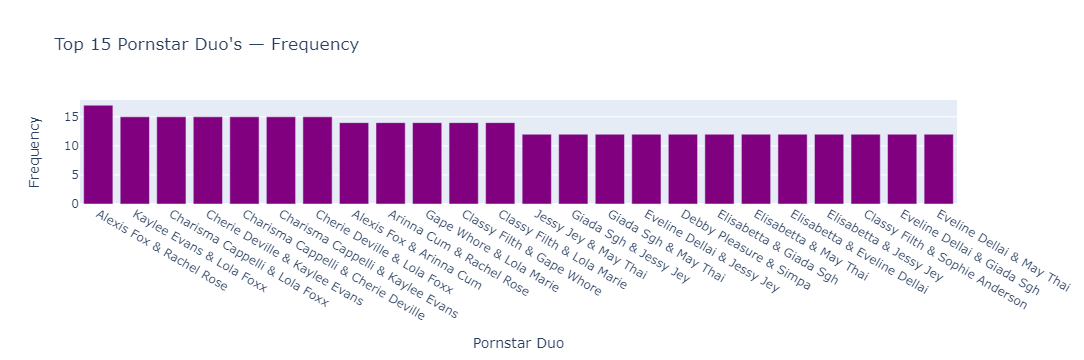

In [17]:
N: int = 15
top_n_pornstar_duos: dict[tuple[str, str], int] = give_top_n(frequency_per_pornstar_pair, n=N)
top_n_pornstar_duos = {(pornstar_pair[0] + " & " + pornstar_pair[1]): frequency for pornstar_pair, frequency in top_n_pornstar_duos.items()}

fig: go.Figure = go.Figure(data=go.Bar(x=list(top_n_pornstar_duos.keys()), y=list(top_n_pornstar_duos.values()), marker_color="purple"))
fig.update_layout(title=f"Top {N} Pornstar Duo's — Frequency", xaxis_title="Pornstar Duo", yaxis_title="Frequency")
fig.show()